# Training a NN with Urban Sound Challenge Data

**Background:**

In parallel to the actuall fall detection experiment, we'll train a neural network leveraging the urban challenge dataset in order to develop the necessary libraries to map wav files to features (either MFCC or spectogram) and baseline the performance of the different approaches)

## Libraries and File Locations

In [39]:
import matplotlib.pyplot as plt
from python_speech_features import mfcc, ssc, logfbank
import pandas as pd
import os
import numpy as np
import soundfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [2]:
test_file_dir = "./tests/wav/"

## Load sample WAV File

Loading in the form of melspectrograms

**MFCCs and Spectrograms**

In [34]:
n_mels = 23

In [71]:
n_windows = 200

In [59]:
samples, sample_rate = soundfile.read(test_file_dir+"Bass-Drum-1.wav")

In [60]:
samples.shape

(55216, 2)

In [61]:
sample_channel_1 = samples[:,1]

In [63]:
hop_length = round(len(sample_channel_1)/n_windows)
hop_length

428

In [64]:
mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_1, 
                                                 sr=sample_rate,
                                                 n_fft=2048, 
                                                 hop_length=hop_length,
                                                 n_mels = n_mels,
                                                fmax = 8000)

In [65]:
mel_spectrogram.shape

(23, 130)

In [69]:
mel_spectrogram[:,:n_windows].shape

(23, 129)

Note that the below function (power_to_db) is equivalent to new: librosa.core.logamplitude

(23, 200)
(23, 200)


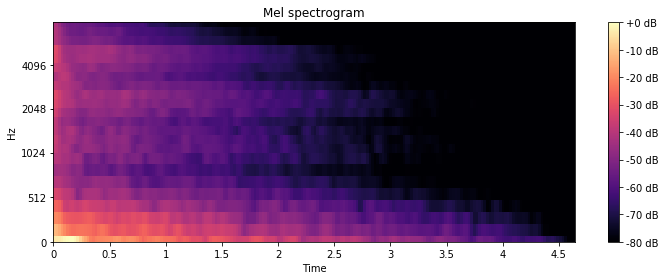

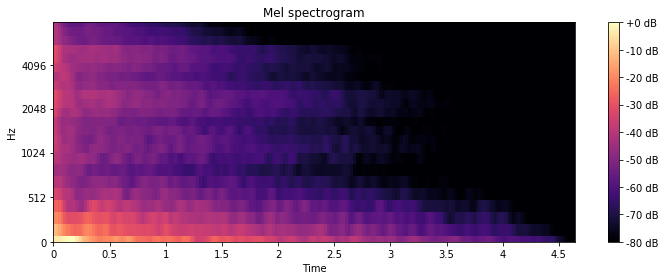

In [72]:
for i in range(samples.shape[1:][0]):
    sample_channel_x = samples[:,i]
    hop_length = round(len(sample_channel_1)/n_windows)
    mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_x, 
                                                 sr=sample_rate,
                                                 n_fft=2048, 
                                                 hop_length=hop_length,
                                                 n_mels = n_mels,
                                                fmax = 8000)
    plt.figure(figsize=(10, 4))
    decibel_spec = librosa.power_to_db(mel_spectrogram,ref=np.max)
    decibel_spec= decibel_spec[:,:n_windows]
    print(decibel_spec.shape)
    librosa.display.specshow(decibel_spec,
                              y_axis='mel', fmax=8000,
                              x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()

## Training using Log Spectrogram

In [3]:
train_df = pd.read_csv(URBAN_SOUND_DIR+'train.csv')
test_df = pd.read_csv(URBAN_SOUND_DIR+'test.csv')

In [ ]:
def parse_features(row,folder,nfft):
    # fun
    #ction to load files and extract features
    file_name = os.path.join(URBAN_SOUND_DIR, folder, str(row.ID) + '.wav')
   # handle exception to check if there isn't a file which is corrupted
    try:
        pass
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return pd.Series([None, None])
    if folder == 'Test':
        return pd.Series([feature])
    return pd.Series([features, row.Class])

In [ ]:
#temp = train_df.apply(parse_mfcc,args=('Train',2400), axis=1)
#temp.columns = ['feature', 'label']

In [ ]:
#temp.dropna(inplace=True)

In [ ]:
#assert temp.shape == (5435,2)